### Basic Application Requirements

In [1]:
# Import necessary models
import pandas as pd
import matplotlib.pyplot as plt
import pyspark
import seaborn as sns
import pyspark.sql  as pyspark_sql
import pyspark.sql.types as pyspark_types
import pyspark.sql.functions as pyspark_functions
from pyspark import SparkContext, SparkConf

### Creating a Spark Session

In [2]:
# Creating spark instance
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

#### Reading the Datasets

In [3]:
# Reading all the datasets (Spark)
col_mat_nuw_data = spark.read.csv("Datasets/col_mat_nuw_output.csv", header=None, inferSchema=True)
kan_output_data = spark.read.csv("Datasets/kan_output.csv", header=None, inferSchema=True)
mon_kur_jaf_output_data = spark.read.csv("Datasets/mon_kur_jaf_output.csv", header=None, inferSchema=True)

In [4]:
# Reading all the datasets (Pandas)
pd_col_mat_nuw = col_mat_nuw_data.toPandas()
pd_kan = kan_output_data.toPandas()
pd_mon_kur_jaf = mon_kur_jaf_output_data.toPandas()

#### Concating 3 datasets into one dataframe

In [5]:
all_city_data = pd.concat([pd_col_mat_nuw, pd_kan, pd_mon_kur_jaf], axis=0)

### Basic Details of the Dataset

##### Dataset of Colombo, Matara and Nuwara

In [6]:
pd_col_mat_nuw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _c0     3059 non-null   float64
 1   _c1     5478 non-null   object 
 2   _c2     5478 non-null   object 
 3   _c3     5478 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [7]:
pd_kan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _c0     1033 non-null   float64
 1   _c1     1826 non-null   object 
 2   _c2     1826 non-null   object 
 3   _c3     1826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB


In [8]:
pd_mon_kur_jaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _c0     3826 non-null   float64
 1   _c1     5478 non-null   object 
 2   _c2     5478 non-null   object 
 3   _c3     5478 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


 It occurs that there are null values in the 1st coloumn (HCHO Reading). Also columns were doesnt named with a meaningful name.

#### Rename Column Names

In [9]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
all_city_data.columns = column_names
pd_col_mat_nuw.columns = column_names
pd_kan.columns = column_names
pd_mon_kur_jaf.columns = column_names

In [10]:
all_city_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


## Basic Preprocessing

### Colombo, Deniyaya, Matara and Nuwara Eliya Data

##### Finding the null/missing values of the dataset.

In [11]:
pd_col_mat_nuw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  3059 non-null   float64
 1   Location      5478 non-null   object 
 2   Current Date  5478 non-null   object 
 3   Next Date     5478 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [12]:
# Finding the null values
pd_col_mat_nuw.isnull().sum()

HCHO Reading    2419
Location           0
Current Date       0
Next Date          0
dtype: int64

Basic plot of the HCHO Reading Distribution

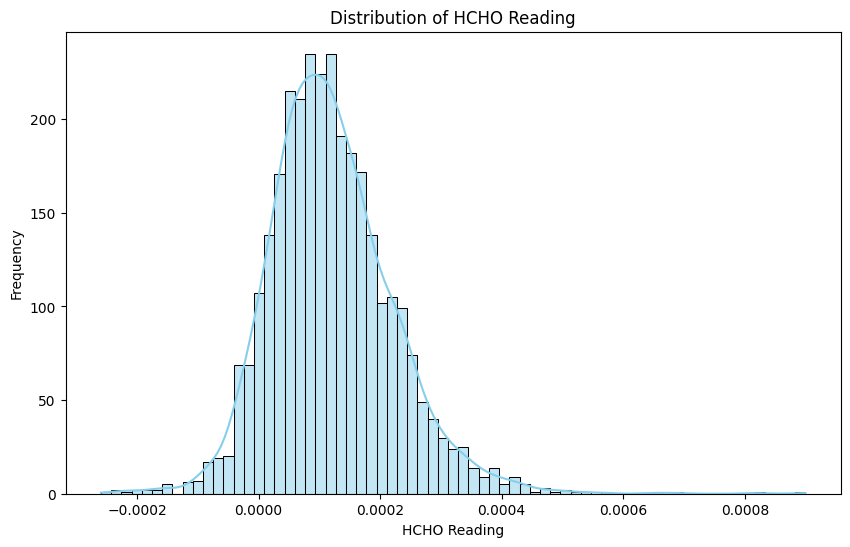

In [13]:
# Plot the distribution of the "HCHO Reading" column
plt.figure(figsize=(10, 6))
sns.histplot(pd_col_mat_nuw["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

There are 2419 null values from a 5478 dataset. If we remove those null values dataset will be reduced to minimum. Therefore let's fill these values with LOCF and NOCB filling methods. Specially these methods were used because the dataframe is a time series data.

In [14]:
# First apply LOCF
pd_col_mat_nuw.fillna(method='ffill', inplace=True)
# Secondly apply NOCB
pd_col_mat_nuw.fillna(method='bfill', inplace=True)

C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\2027188951.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_col_mat_nuw.fillna(method='ffill', inplace=True)
C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\2027188951.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_col_mat_nuw.fillna(method='bfill', inplace=True)


In [15]:
# Finding null values after the data filling
pd_col_mat_nuw.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

Now You can see that there are no missing/Null values. Let's see the distribution of the Data feature to check how the distribution goes.

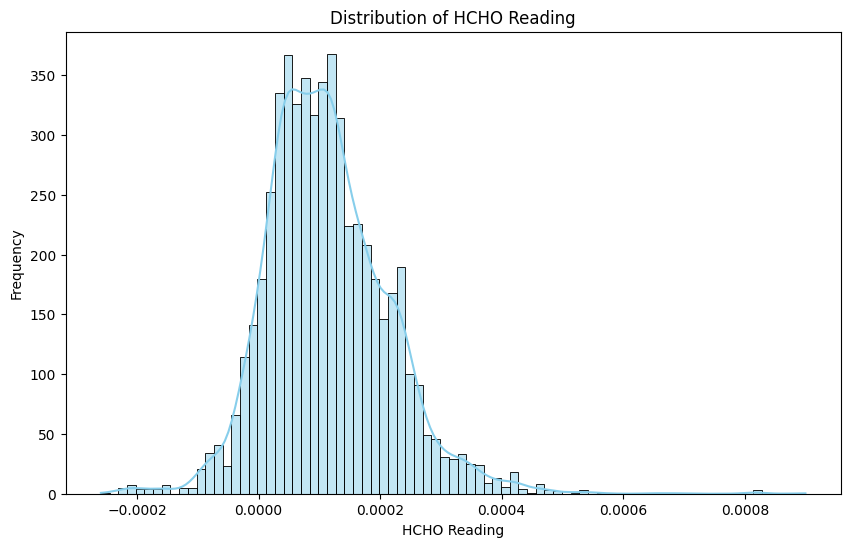

In [16]:
# Plot the distribution of the "HCHO Reading" column
plt.figure(figsize=(10, 6))
sns.histplot(pd_col_mat_nuw["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

### Duplicate Value Handling

In [17]:
# Finding duplicated records in the dataset
duplicate_rows = pd_col_mat_nuw[pd_col_mat_nuw.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [HCHO Reading, Location, Current Date, Next Date]
Index: []


There is no Duplicate value rows in this dataframe

#### Finding Unique values to find unwanted characters

In [18]:
# Printing each unique value in a column
for column in pd_col_mat_nuw:
    print(column)
    print(pd_col_mat_nuw[column].unique())
    print('\n')

HCHO Reading
[1.96983440e-04 2.62552217e-04 9.85211890e-05 ... 1.07861038e-04
 5.93039927e-06 2.36988212e-04]


Location
['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper']


Current Date
[datetime.date(2019, 1, 1) datetime.date(2019, 1, 2)
 datetime.date(2019, 1, 3) ... datetime.date(2023, 12, 29)
 datetime.date(2023, 12, 30) datetime.date(2023, 12, 31)]


Next Date
[datetime.date(2019, 1, 2) datetime.date(2019, 1, 3)
 datetime.date(2019, 1, 4) ... datetime.date(2023, 12, 30)
 datetime.date(2023, 12, 31) datetime.date(2024, 1, 1)]




There is no unwanted characters in the dataset and all good to go forward this dataframe.

#### Outliers Handling

Boxplot to Check the Outliers of the HCHO data

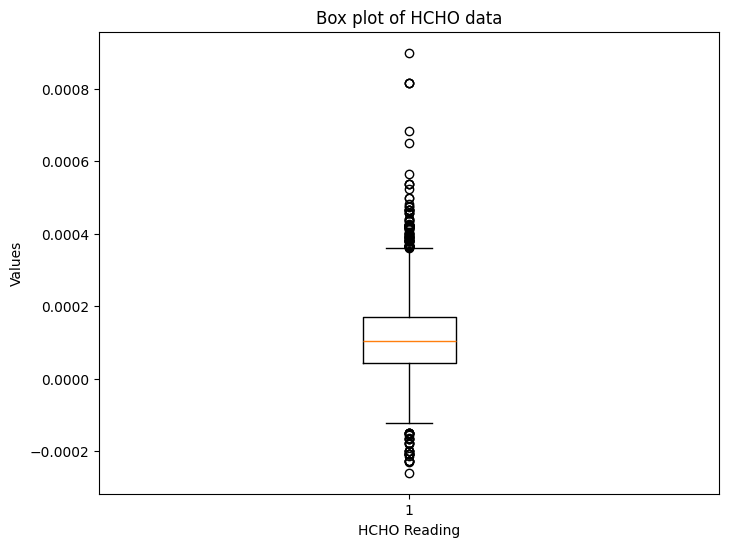

In [19]:
# Create a box plot for HCHO feature
plt.figure(figsize=(8, 6))
plt.boxplot(pd_col_mat_nuw['HCHO Reading'])
plt.title('Box plot of HCHO data')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

In [20]:
# Remvoing Outliers in the dataframe
# Calculate the first quartile (Q1) and third quartile (Q3)

Q1 = pd_col_mat_nuw['HCHO Reading'].quantile(0.25)
Q3 = pd_col_mat_nuw['HCHO Reading'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
pd_col_mat_nuw = pd_col_mat_nuw[(pd_col_mat_nuw['HCHO Reading'] >= lower_bound) & (pd_col_mat_nuw['HCHO Reading'] <= upper_bound)]

##### Boxplot after Outlier handling

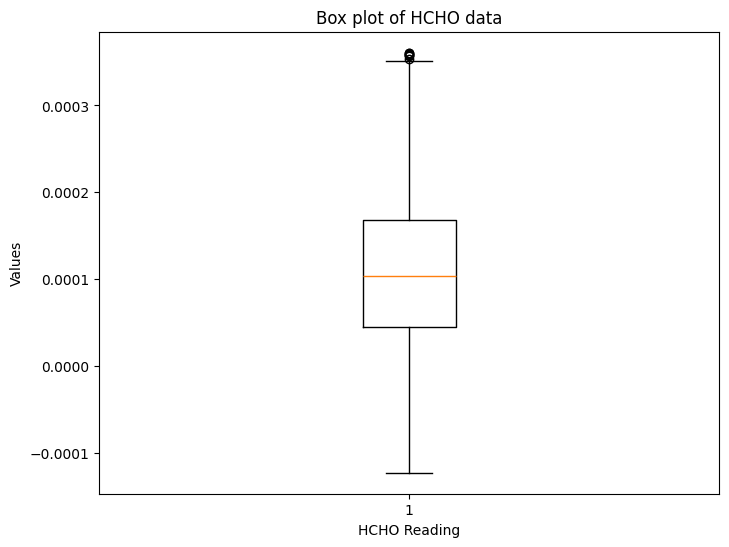

In [21]:
# Create a box plot for HCHO feature
plt.figure(figsize=(8, 6))
plt.boxplot(pd_col_mat_nuw['HCHO Reading'])
plt.title('Box plot of HCHO data')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

### Status after Pre-Processing

In [22]:
# Dataframe Info
pd_col_mat_nuw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5353 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  5353 non-null   float64
 1   Location      5353 non-null   object 
 2   Current Date  5353 non-null   object 
 3   Next Date     5353 non-null   object 
dtypes: float64(1), object(3)
memory usage: 209.1+ KB


In [23]:
# Data Description
pd_col_mat_nuw.describe()

,HCHO Reading
count,5353.000000
mean,0.000110
std,0.000087
min,-0.000123
25%,0.000045
50%,0.000104
75%,0.000168
max,0.000361


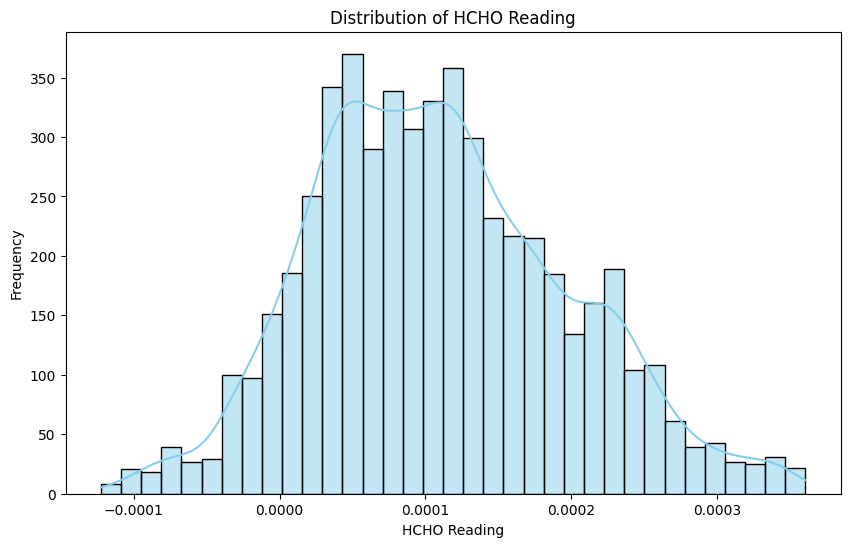

In [24]:
# Distribution
plt.figure(figsize=(10, 6))
sns.histplot(pd_col_mat_nuw["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

### Kandy Data

##### Finding the null/missing values of the dataset.

In [25]:
pd_kan.isnull().sum()

HCHO Reading    793
Location          0
Current Date      0
Next Date         0
dtype: int64

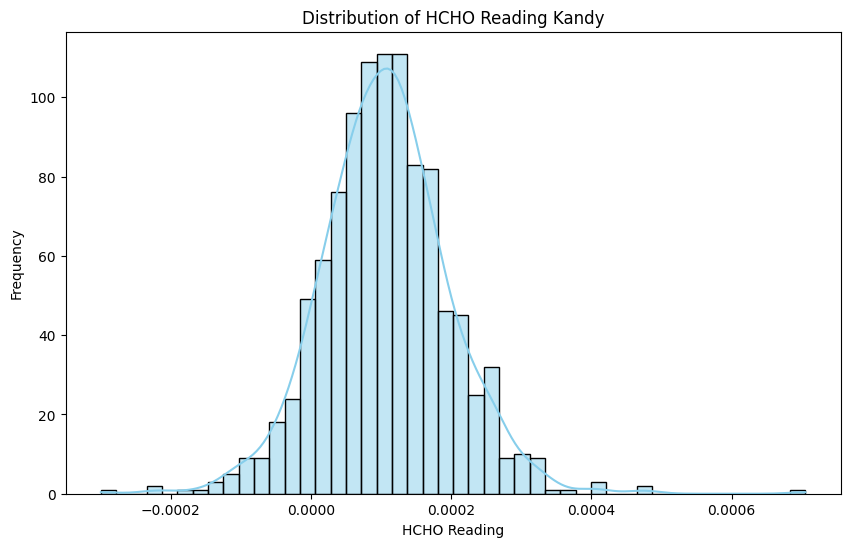

In [26]:
# Distribution
plt.figure(figsize=(10, 6))
sns.histplot(pd_kan["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading Kandy')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

There is 793 null values in this dataframe too. Therefore let's get rid of them same as we did with the previous dataset. (LOCB,NOCB)

In [27]:
# First apply LOCF
pd_kan.fillna(method='ffill', inplace=True)

# Secondly apply NOCB
pd_kan.fillna(method='bfill', inplace=True)

C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\1233880663.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_kan.fillna(method='ffill', inplace=True)
C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\1233880663.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_kan.fillna(method='bfill', inplace=True)


In [28]:
# Finding null values after the data filling
pd_col_mat_nuw.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

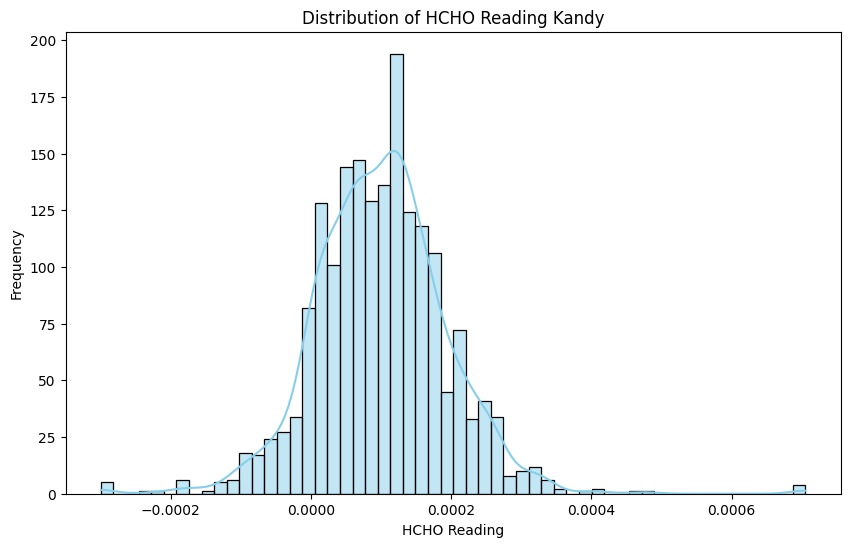

In [29]:
# Distribution
plt.figure(figsize=(10, 6))
sns.histplot(pd_kan["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading Kandy')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

##### Finding Duplicate Values in the Dataframe

In [30]:
# Finding duplicated records in the dataset
duplicate_rows = pd_kan[pd_kan.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [HCHO Reading, Location, Current Date, Next Date]
Index: []


There is no Duplicate values in this dataframe too. Therefore let's continue with these data.

### Finding Unwanted Characters in the dataframe

In [31]:
# Printing each unique value in a column
for column in pd_kan:
    print(column)
    print(pd_kan[column].unique())
    print('\n')

HCHO Reading
[ 1.76071346e-04  9.22039125e-05  1.90868198e-04 ... -6.89829189e-06
  1.16311409e-04  5.59012026e-05]


Location
['Kandy Proper']


Current Date
[datetime.date(2019, 1, 1) datetime.date(2019, 1, 2)
 datetime.date(2019, 1, 3) ... datetime.date(2023, 12, 29)
 datetime.date(2023, 12, 30) datetime.date(2023, 12, 31)]


Next Date
[datetime.date(2019, 1, 2) datetime.date(2019, 1, 3)
 datetime.date(2019, 1, 4) ... datetime.date(2023, 12, 30)
 datetime.date(2023, 12, 31) datetime.date(2024, 1, 1)]




#### Outliers Handling

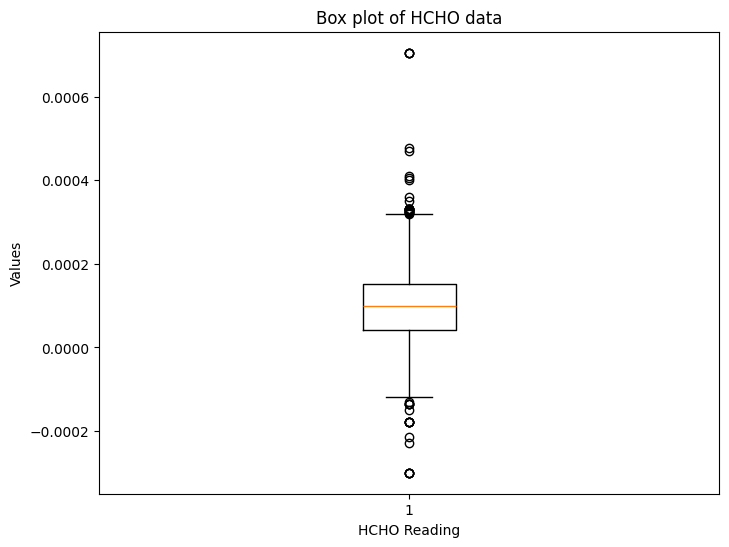

In [32]:
# Create a box plot for HCHO feature
plt.figure(figsize=(8, 6))
plt.boxplot(pd_kan['HCHO Reading'])
plt.title('Box plot of HCHO data')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

In [33]:
# Remvoing Outliers in the dataframe
# Calculate the first quartile (Q1) and third quartile (Q3)

Q1 = pd_kan['HCHO Reading'].quantile(0.25)
Q3 = pd_kan['HCHO Reading'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
pd_kan = pd_kan[(pd_kan['HCHO Reading'] >= lower_bound) & (pd_kan['HCHO Reading'] <= upper_bound)]

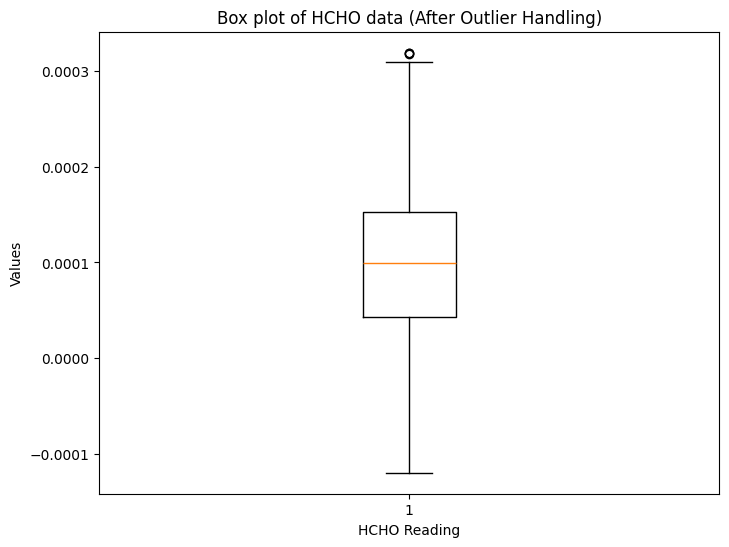

In [34]:
# Create a box plot for HCHO feature
plt.figure(figsize=(8, 6))
plt.boxplot(pd_kan['HCHO Reading'])
plt.title('Box plot of HCHO data (After Outlier Handling)')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

In [35]:
# Info of the dataframe
pd_kan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1825
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  1781 non-null   float64
 1   Location      1781 non-null   object 
 2   Current Date  1781 non-null   object 
 3   Next Date     1781 non-null   object 
dtypes: float64(1), object(3)
memory usage: 69.6+ KB


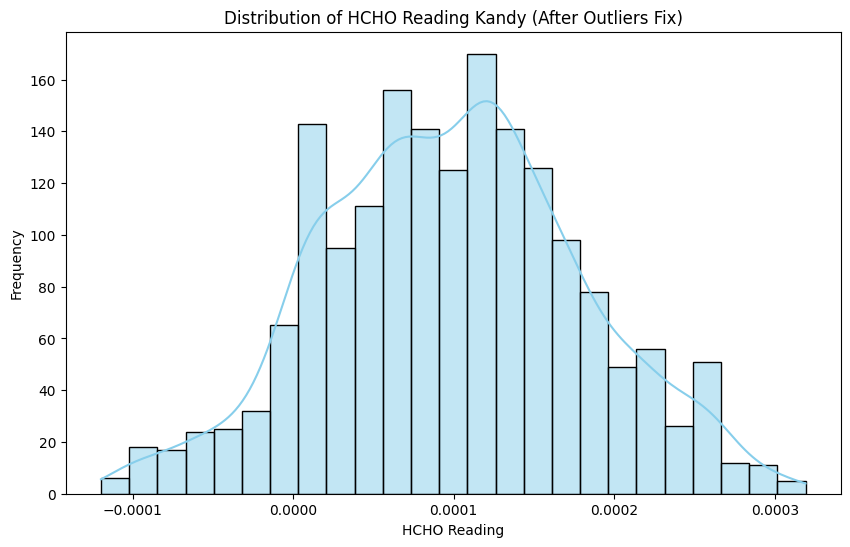

In [36]:
# Distribution after outlier fixation
plt.figure(figsize=(10, 6))
sns.histplot(pd_kan["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading Kandy (After Outliers Fix)')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

### Bibile, Monaragala, Kurunegala and Jaffna Cities

##### Finding Null/Missing values in the dataframe

In [37]:
# Basic Details of the dataframe
pd_mon_kur_jaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5478 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  3826 non-null   float64
 1   Location      5478 non-null   object 
 2   Current Date  5478 non-null   object 
 3   Next Date     5478 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.3+ KB


In [38]:
pd_mon_kur_jaf.isnull().sum()

HCHO Reading    1652
Location           0
Current Date       0
Next Date          0
dtype: int64

There is 1652 missing values out of 5477. Therefore let's fill this using same methods that used in previous dataframes.

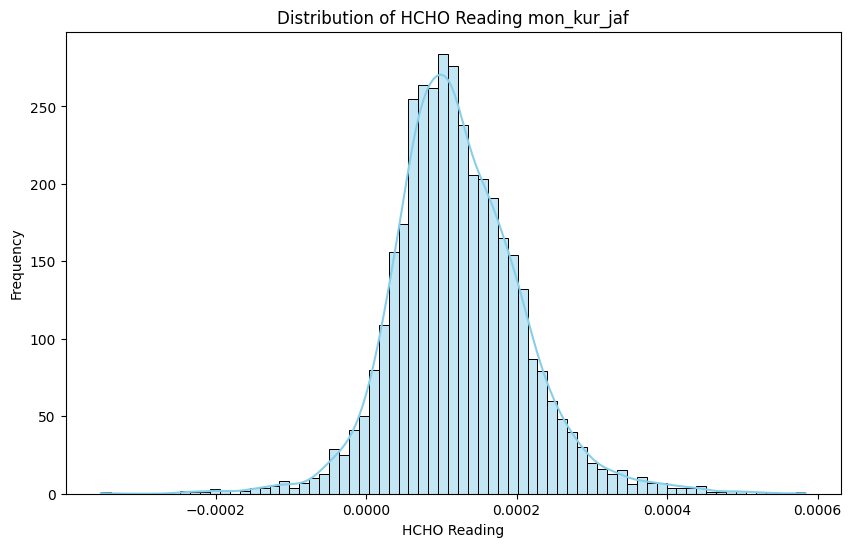

In [39]:
# Data Distribution (Before missing value fixation)
plt.figure(figsize=(10, 6))
sns.histplot(pd_mon_kur_jaf["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading mon_kur_jaf')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

In [40]:
# First apply LOCF
pd_mon_kur_jaf.fillna(method='ffill', inplace=True)

# Secondly apply NOCB
pd_mon_kur_jaf.fillna(method='bfill', inplace=True)

C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\1117807034.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_mon_kur_jaf.fillna(method='ffill', inplace=True)
C:\Users\Sandin Maheeshakya\AppData\Local\Temp\ipykernel_8508\1117807034.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pd_mon_kur_jaf.fillna(method='bfill', inplace=True)


In [41]:
# After fix null value count
pd_mon_kur_jaf.isnull().sum()

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

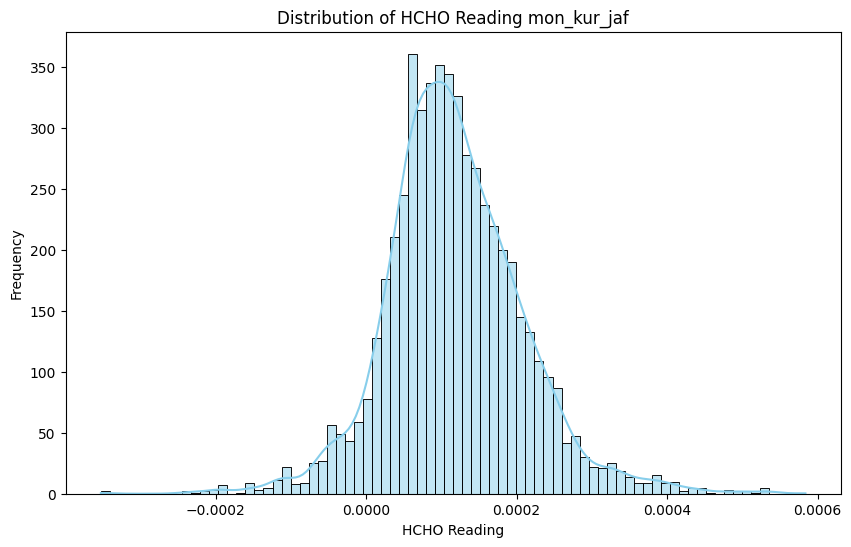

In [42]:
# Data Distribution (After missing value fixation)
plt.figure(figsize=(10, 6))
sns.histplot(pd_mon_kur_jaf["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading mon_kur_jaf')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

Finding Duplicates values in the dataframe

In [43]:
# Finding duplicated records in the dataset
duplicate_rows = pd_mon_kur_jaf[pd_mon_kur_jaf.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [HCHO Reading, Location, Current Date, Next Date]
Index: []


There is no duplicated records in the dataframe.

#### Finding Unique values in order to detect unwanted characters

In [44]:
# Printing each unique value in a column
for column in pd_mon_kur_jaf:
    print(column)
    print(pd_mon_kur_jaf[column].unique())
    print('\n')

HCHO Reading
[1.91991465e-05 2.81144794e-05 3.74799818e-05 ... 1.26723537e-04
 1.16658954e-04 6.54085299e-05]


Location
['Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


Current Date
[datetime.date(2019, 1, 1) datetime.date(2019, 1, 2)
 datetime.date(2019, 1, 3) ... datetime.date(2023, 12, 29)
 datetime.date(2023, 12, 30) datetime.date(2023, 12, 31)]


Next Date
[datetime.date(2019, 1, 2) datetime.date(2019, 1, 3)
 datetime.date(2019, 1, 4) ... datetime.date(2023, 12, 30)
 datetime.date(2023, 12, 31) datetime.date(2024, 1, 1)]




There is no unwanted characters in this dataset so let's head to fill outliers.

#### Outlier Handling

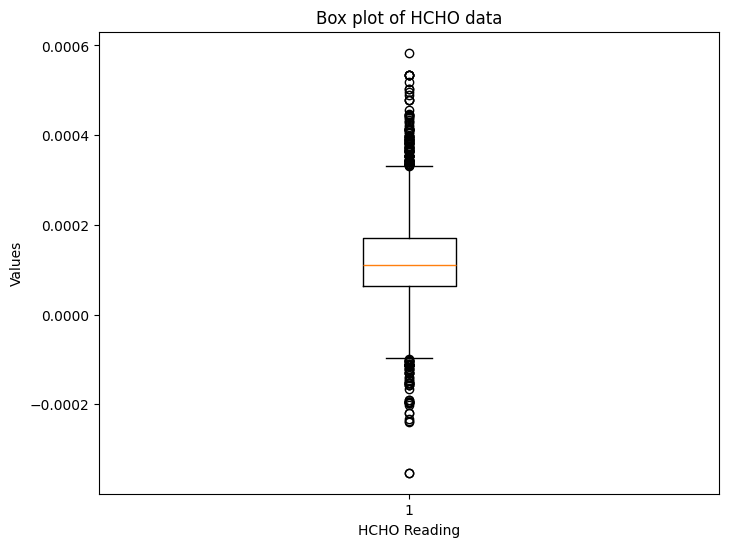

In [45]:
# Boxplot for detect outliers
plt.figure(figsize=(8, 6))
plt.boxplot(pd_mon_kur_jaf['HCHO Reading'])
plt.title('Box plot of HCHO data')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

In [46]:
# Remvoing Outliers in the dataframe
# Calculate the first quartile (Q1) and third quartile (Q3)

Q1 = pd_kan['HCHO Reading'].quantile(0.25)
Q3 = pd_kan['HCHO Reading'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
pd_mon_kur_jaf = pd_mon_kur_jaf[(pd_mon_kur_jaf['HCHO Reading'] >= lower_bound) & (pd_mon_kur_jaf['HCHO Reading'] <= upper_bound)]

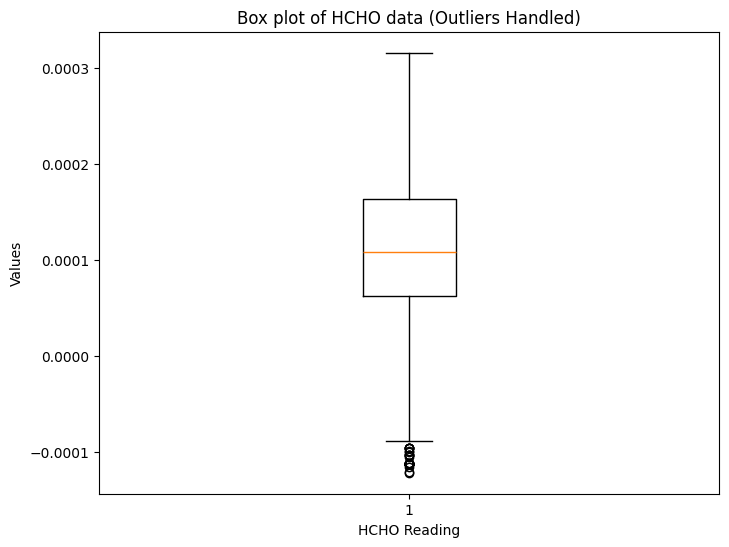

In [47]:
# Boxplot for detect outliers
plt.figure(figsize=(8, 6))
plt.boxplot(pd_mon_kur_jaf['HCHO Reading'])
plt.title('Box plot of HCHO data (Outliers Handled)')
plt.xlabel('HCHO Reading')
plt.ylabel('Values')
plt.show()

In [48]:
# Dataframe info
pd_mon_kur_jaf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5296 entries, 0 to 5477
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  5296 non-null   float64
 1   Location      5296 non-null   object 
 2   Current Date  5296 non-null   object 
 3   Next Date     5296 non-null   object 
dtypes: float64(1), object(3)
memory usage: 206.9+ KB


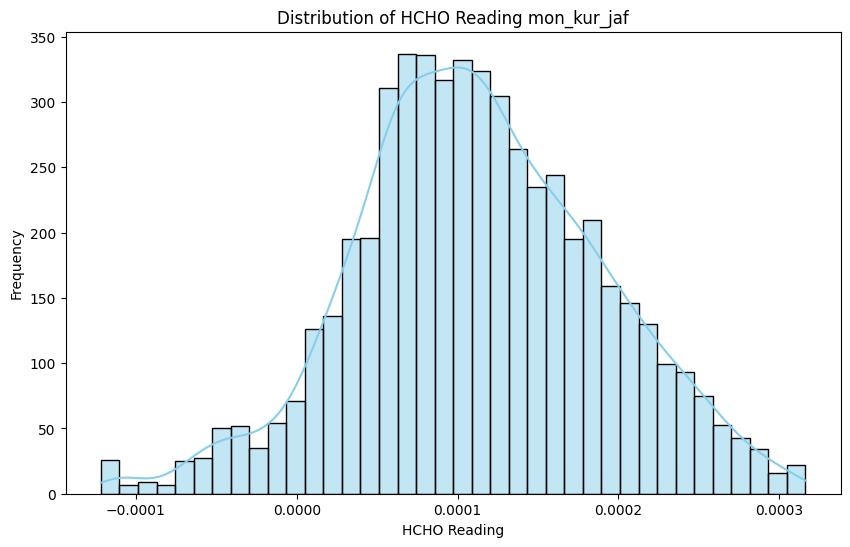

In [49]:
# Data Distribution (After missing value fixation)
plt.figure(figsize=(10, 6))
sns.histplot(pd_mon_kur_jaf["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading mon_kur_jaf')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.show()

Now all the data points are fixed by handling outliers, null values and mistakes let's continue to visualize and analyze the data.

#### Combining all the datasets to a one dataframe

In [66]:
# Joining datasets together
cleaned_all_data = pd.concat([pd_col_mat_nuw, pd_kan, pd_mon_kur_jaf], axis=0)


# Saving the dataset
cleaned_all_data.to_csv('Cleaned_HCHO_Data.csv', index=False)

## Statictics Before and After Pre-Processing

### Entire Dataset Statistics

#### Statstical Summary

In [53]:
# Display statistical summaries
print("Uncleaned Data Statistics:\n", all_city_data.describe())
print("Cleaned Data Statistics:\n", cleaned_all_data.describe())

Uncleaned Data Statistics:
        HCHO Reading
count   7918.000000
mean       0.000119
std        0.000093
min       -0.000352
25%        0.000061
50%        0.000112
75%        0.000172
max        0.000900
Cleaned Data Statistics:
        HCHO Reading
count  12430.000000
mean       0.000109
std        0.000082
min       -0.000123
25%        0.000053
50%        0.000106
75%        0.000163
max        0.000361


#### Data Distribution

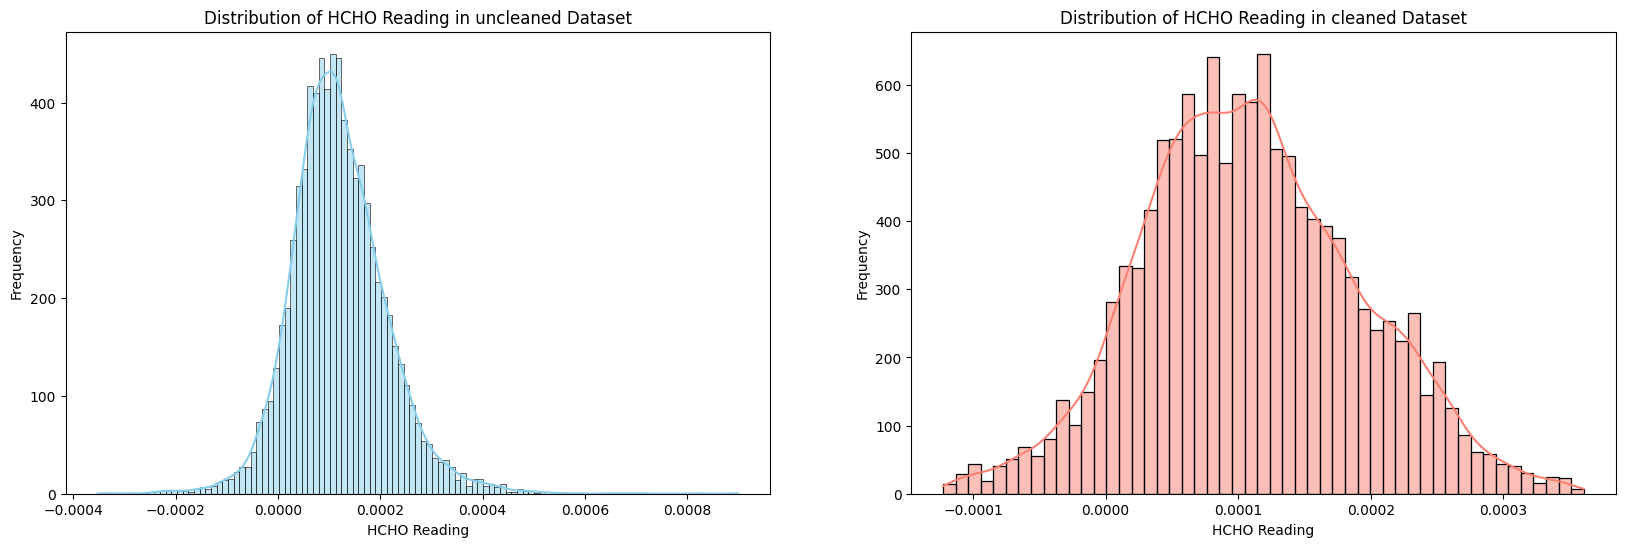

In [51]:
# Creating a figure with 2 subplots
plt.figure(figsize=(20, 6))

# Plot for the uncleaned dataser
plt.subplot(1, 2, 1) 
sns.histplot(all_city_data["HCHO Reading"], kde=True, color='skyblue')
plt.title('Distribution of HCHO Reading in uncleaned Dataset')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')

# Plot for the cleaned dataset
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(cleaned_all_data["HCHO Reading"], kde=True, color='salmon')
plt.title('Distribution of HCHO Reading in cleaned Dataset')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')

# Show the plots
plt.show()

There now after pre-processing the dataset tooks more of shape of a normal distribution than the previous uncleaned data. So now the any ML calculations with this dataset going to be better.

#### Missing value analysis

In [54]:
# Count missing values
print("Missing values in uncleaned data:\n", all_city_data.isnull().sum())
print("Missing values in cleaned data:\n", cleaned_all_data.isnull().sum())


Missing values in uncleaned data:
 HCHO Reading    4864
Location           0
Current Date       0
Next Date          0
dtype: int64
Missing values in cleaned data:
 HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


All the missing values has been handled

## Data Description

Spark is a great way to describe and analyse the data, Therefore Data description and anlysis can be done by spark and for plots use matplotlib.

#### Basic Attributes

In [69]:
# Creating spark version of the dataframe
spark_cleaned_data = spark.read.csv("Cleaned_HCHO_Data.csv", header=True, inferSchema=True)

##### Schema and Data

In [71]:
# Show the first few rows of the DataFrame
spark_cleaned_data.show()

# Display the schema of the DataFrame
spark_cleaned_data.printSchema()

+--------------------+--------------+------------+----------+
|        HCHO Reading|      Location|Current Date| Next Date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|1.569418094178759...|Colombo Proper|  2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|  2019-01-14|2019-01-15|
|6.37441

##### Summary Statictics

In [72]:
# Summary statistics
summary_df = spark_cleaned_data.describe()
summary_df.show()

+-------+--------------------+-------------------+
|summary|        HCHO Reading|           Location|
+-------+--------------------+-------------------+
|  count|               12430|              12430|
|   mean|1.092515561230709...|               NULL|
| stddev|8.229007010470654E-5|               NULL|
|    min|-1.22666926472447...| Bibile, Monaragala|
|    max|3.606924125485871E-4|Nuwara Eliya Proper|
+-------+--------------------+-------------------+



#### Mean of the Dataset

All City Attributes

Overall Mean, Median and Standard Deviation

In [76]:
# Calculate overall descriptive statistics
overall_stats = spark_cleaned_data.agg(
    pyspark_functions.mean("HCHO Reading").alias("Overall Mean"),
    pyspark_functions.expr("percentile_approx(`HCHO Reading`, 0.5)").alias("Overall Median"),
    pyspark_functions.stddev("HCHO Reading").alias("Overall Standard Deviation")
)
overall_stats.show()

+--------------------+--------------------+--------------------------+
|        Overall Mean|      Overall Median|Overall Standard Deviation|
+--------------------+--------------------+--------------------------+
|1.092515561230709...|1.056099522237152...|      8.229007010470654E-5|
+--------------------+--------------------+--------------------------+



##### Mean Distribution

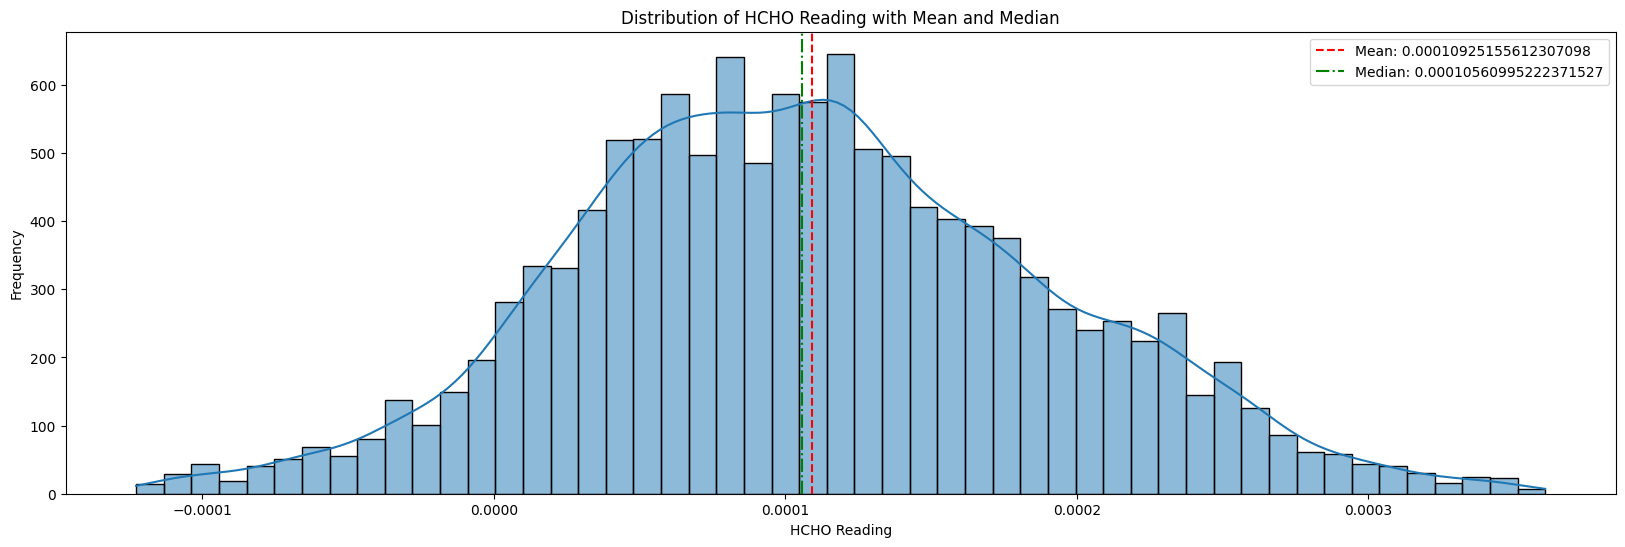

In [80]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
overall_stats_pd = overall_stats.toPandas()

# Extract statistics values
mean = overall_stats_pd.at[0, "Overall Mean"]
median = overall_stats_pd.at[0, "Overall Median"]
std_dev = overall_stats_pd.at[0, "Overall Standard Deviation"]

# Plot distribution chart
plt.figure(figsize=(20, 6))
sns.histplot(spark_cleaned_data.select("HCHO Reading").toPandas(), kde=True)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean}')
plt.axvline(median, color='g', linestyle='-.', label=f'Median: {median}')
plt.legend()
plt.xlabel("HCHO Reading")
plt.ylabel("Frequency")
plt.title("Distribution of HCHO Reading with Mean and Median")
plt.show()

##### Statictics in Each City

In [87]:
# Calculate mean, median, and standard deviation for each city
stats_per_city = spark_cleaned_data.groupBy('Location').agg(
    pyspark_functions.mean("HCHO Reading").alias("City Mean"),
    pyspark_functions.expr("percentile_approx(`HCHO Reading`, 0.5)").alias("City Median"),
    pyspark_functions.stddev("HCHO Reading").alias("City Standard Deviation")
)
stats_per_city.show()

+-------------------+--------------------+--------------------+-----------------------+
|           Location|           City Mean|         City Median|City Standard Deviation|
+-------------------+--------------------+--------------------+-----------------------+
|       Kandy Proper| 9.86294085689202E-5|9.951467357187598E-5|   8.109875793613297E-5|
|   Deniyaya, Matara|9.055423909332843E-5|8.082623468883076E-5|   8.019923920580598E-5|
|  Kurunegala Proper|1.193281737040601...|1.160963242857760...|   7.997666030272777E-5|
| Bibile, Monaragala|1.147627176705481...|1.157936673969324...|   8.207456531197269E-5|
|     Colombo Proper|1.474093208417036...|1.409489129117571...|   8.750614481130785E-5|
|Nuwara Eliya Proper|9.156068845449965E-5|8.279063772929044E-5|   8.209042865419234E-5|
|      Jaffna Proper|1.032985491239088...|9.819619171927931E-5|   6.711349330023724E-5|
+-------------------+--------------------+--------------------+-----------------------+



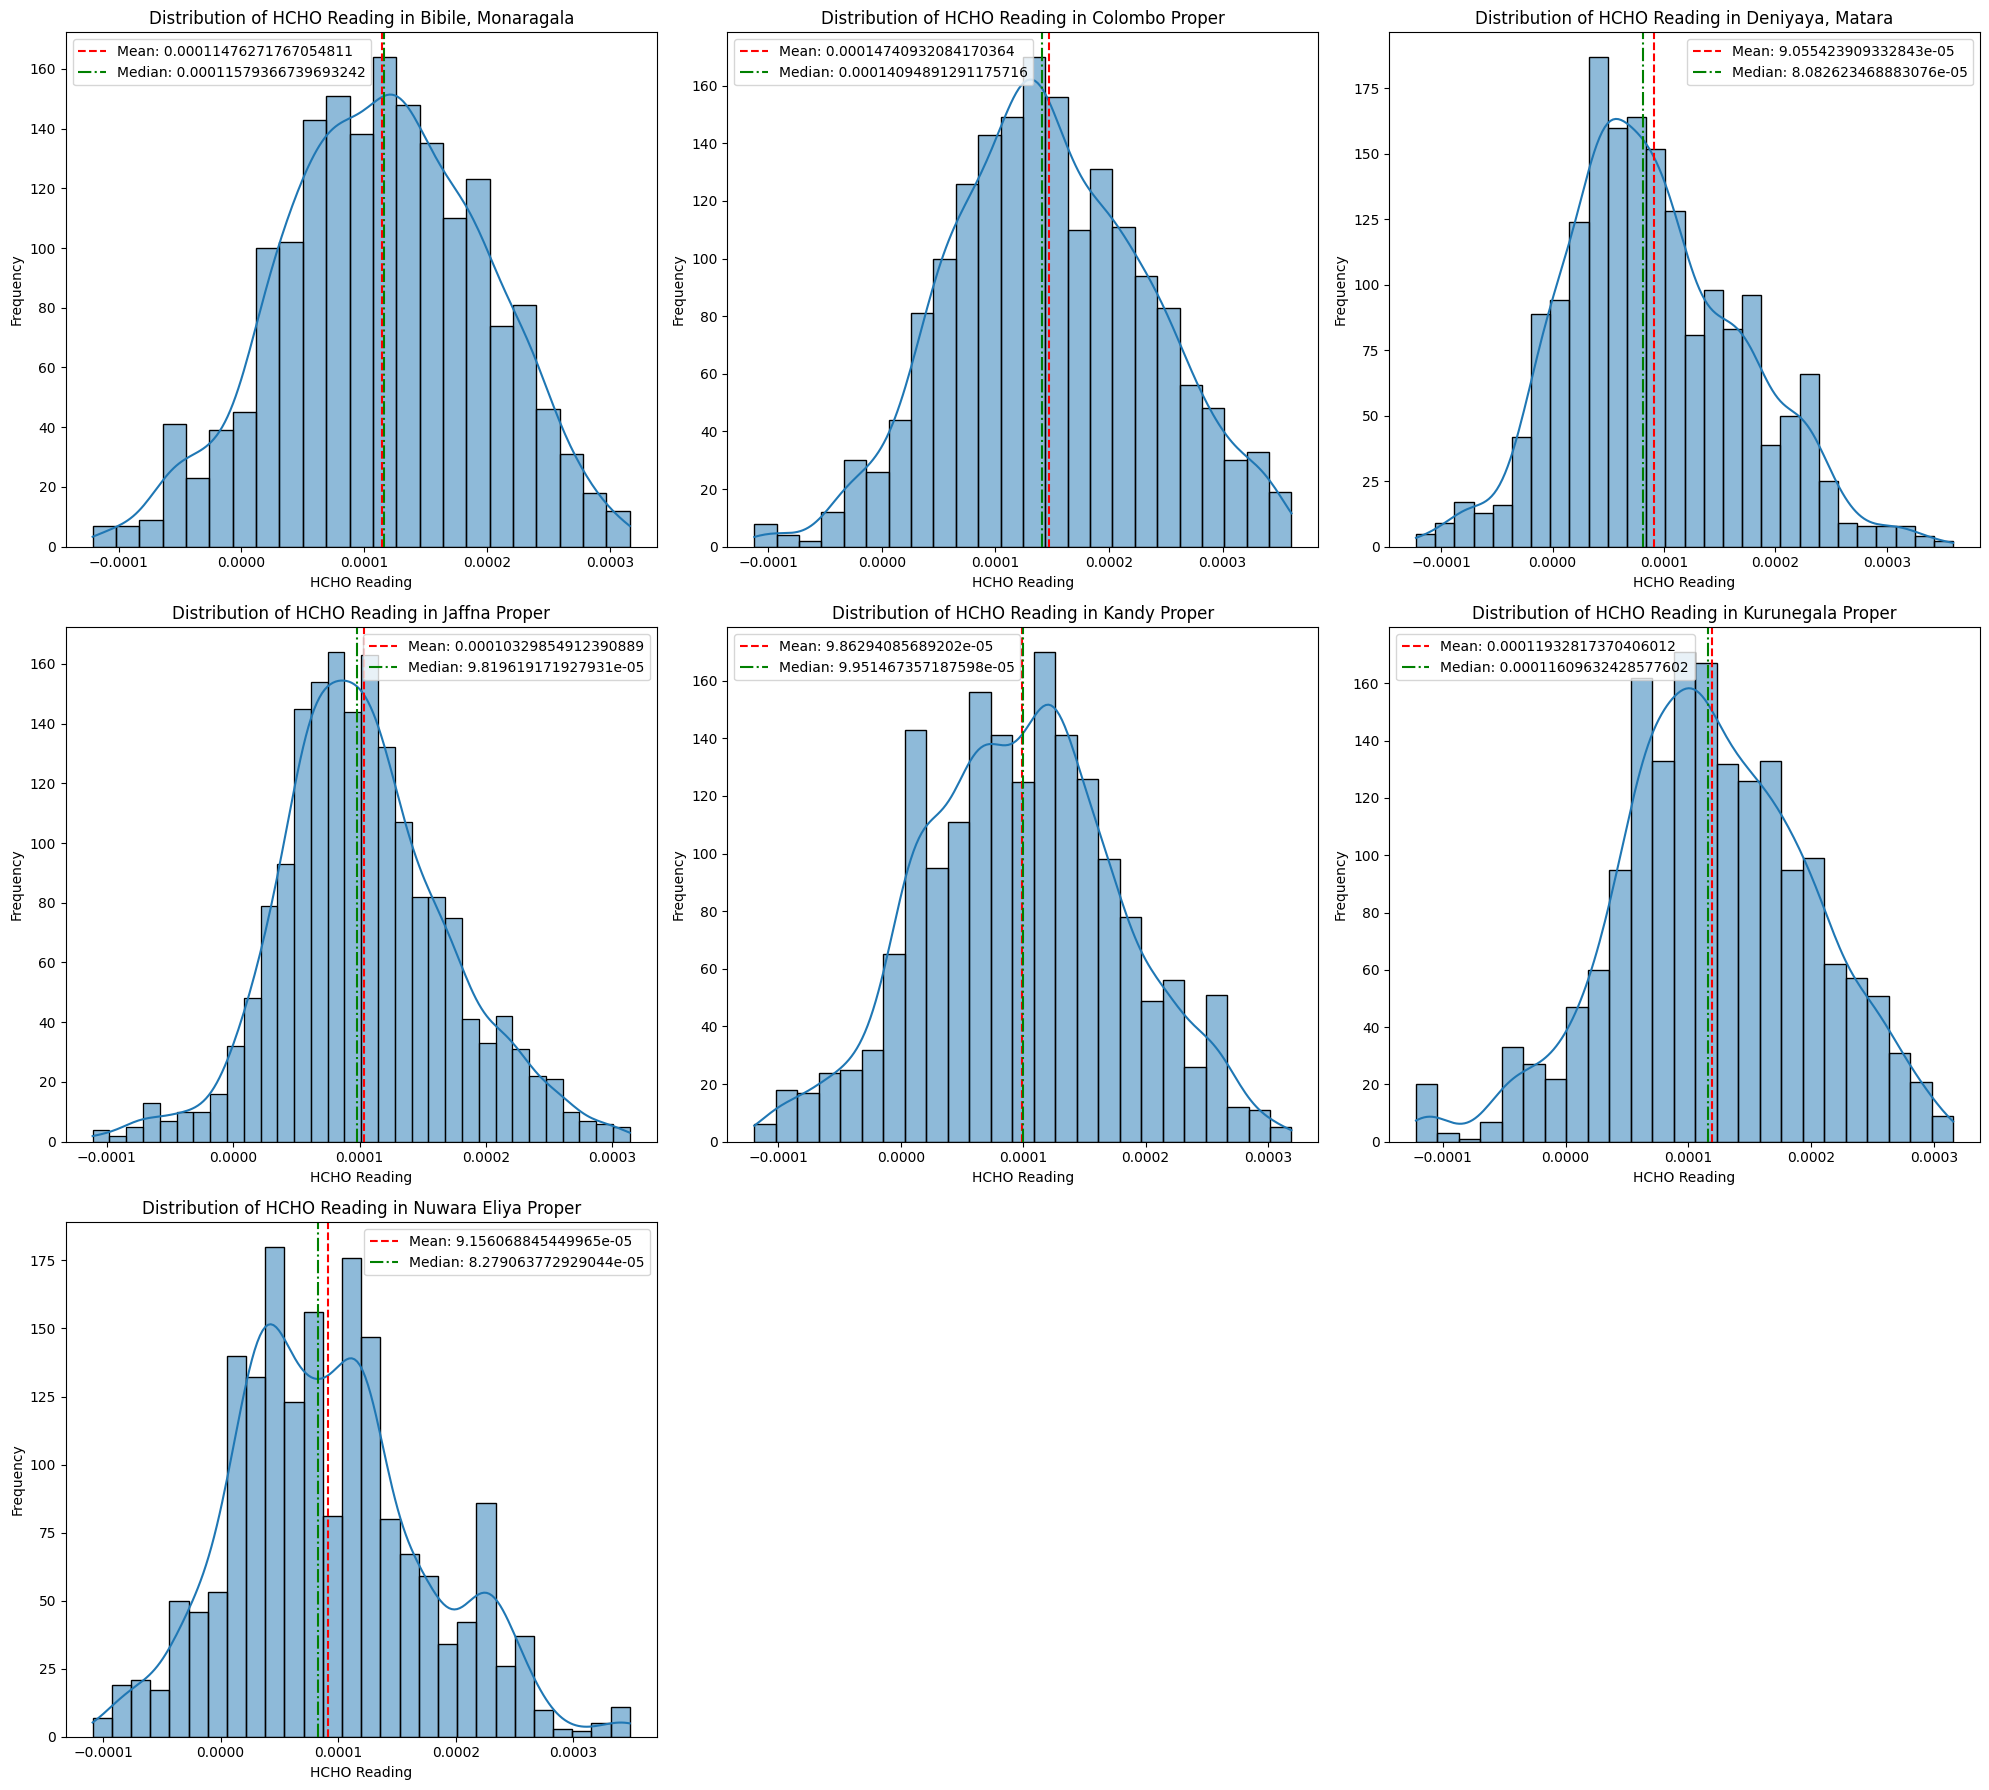

In [94]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
stats_per_city_pd = stats_per_city.toPandas()

# Create subplots
num_cols = 3  # Number of columns for subplots
num_rows = (len(stats_per_city_pd) + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6*num_rows))

# Flatten the axs array if it's a multi-dimensional array
if num_rows > 1:
    axs = axs.flatten()

# Plotting for each location
for i, (location, data) in enumerate(stats_per_city_pd.groupby('Location')):
    # Extract statistics values for the current location
    mean = data["City Mean"].iloc[0]
    median = data["City Median"].iloc[0]
    std_dev = data["City Standard Deviation"].iloc[0]
    
    # Plot distribution chart for the current location
    sns.histplot(data=spark_cleaned_data.filter(pyspark_functions.col('Location') == location).select("HCHO Reading").toPandas(), kde=True, ax=axs[i])
    
    # Add mean, median, and standard deviation to the plot
    axs[i].axvline(mean, color='r', linestyle='--', label=f'Mean: {mean}')
    axs[i].axvline(median, color='g', linestyle='-.', label=f'Median: {median}')
    axs[i].legend()
    axs[i].set_xlabel("HCHO Reading")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Distribution of HCHO Reading in {location}")

# Hide empty subplots if there are any
for j in range(len(stats_per_city_pd), num_cols*num_rows):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


### HCHO air changes over past years

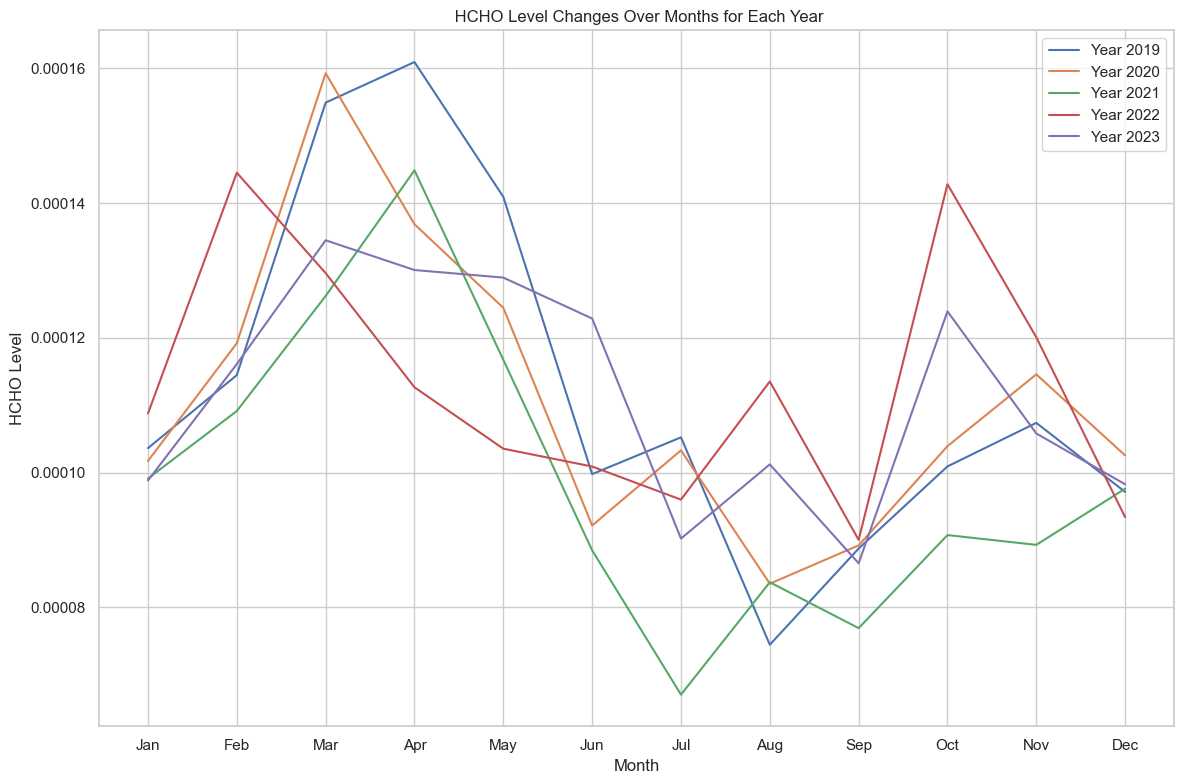

In [97]:
# Convert Spark DataFrame to Pandas DataFrame for plotting
df_pd = spark_cleaned_data.toPandas()

# Extract year and month from the Date column
df_pd['Year'] = pd.to_datetime(df_pd['Current Date']).dt.year
df_pd['Month'] = pd.to_datetime(df_pd['Current Date']).dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho = df_pd.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Loop through each year and plot HCHO levels over months
for year in monthly_mean_hcho['Year'].unique():
    data_year = monthly_mean_hcho[monthly_mean_hcho['Year'] == year]
    plt.plot(data_year['Month'], data_year['HCHO Reading'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title(' HCHO Level Changes Over Months for Each Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


well when comapring HCHO Level varies over the months in every year we can see in every year the months between june - september HCHO levels are gradually lower. and also in the months of march to may they are comparetively higher.